In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [3]:
fish_base_data = pd.read_csv('./Fish.csv')

In [4]:
fish_base_data


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be performed using machine friendly data and estimate the weight of fish can be predicted.

In [5]:
fish_base_data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [6]:
fish_base_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Species,159,7,Perch,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight,159.0,NaN,NaN,NaN,398.326415,357.978317,0.0,120.0,273.0,650.0,1650.0
Length1,159.0,NaN,NaN,NaN,26.24717,9.996441,7.5,19.05,25.2,32.7,59.0
Length2,159.0,NaN,NaN,NaN,28.415723,10.716328,8.4,21.0,27.3,35.5,63.4
Length3,159.0,NaN,NaN,NaN,31.227044,11.610246,8.8,23.15,29.4,39.65,68.0
Height,159.0,NaN,NaN,NaN,8.970994,4.286208,1.7284,5.9448,7.786,12.3659,18.957
Width,159.0,NaN,NaN,NaN,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


C:\Users\bha38\Anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

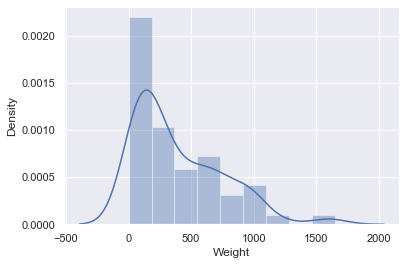

In [7]:
sns.distplot(fish_base_data['Weight'])

In [8]:
# Species is a categorical variable with 7 different values

# Weight is the output variable

# Other variables are input variables - Length1, Length2, Length3, Height, Weight

In [9]:
# Dealing with Outliers
q = fish_base_data['Weight'].quantile(0.99)
fish_data1 = fish_base_data[fish_base_data['Weight']<q]
fish_data1['Weight'].describe()

count     157.000000
mean      382.700000
std       332.033516
min         0.000000
25%       120.000000
50%       272.000000
75%       620.000000
max      1550.000000
Name: Weight, dtype: float64

C:\Users\bha38\Anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length1', ylabel='Density'>

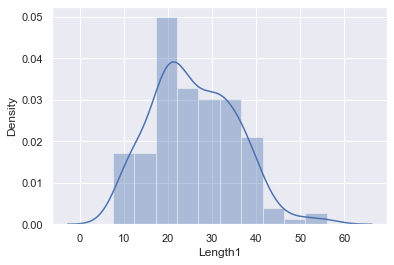

In [10]:
sns.distplot(fish_data1['Length1'])

In [11]:
q = fish_data1['Length1'].quantile(0.99)
fish_data1 = fish_data1[fish_data1['Length1']<q]
fish_data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,155.0,369.573548,312.685376,0.0000,120.00000,270.0000,605.0000,1100.000
Length1,155.0,25.485806,8.897865,7.5000,19.00000,25.0000,32.0000,48.300
Length2,155.0,27.604516,9.555969,8.4000,21.00000,26.5000,35.0000,51.700
Length3,155.0,30.383226,10.468442,8.8000,22.95000,29.2000,39.3500,55.100
Height,155.0,8.939934,4.336074,1.7284,5.92695,7.6156,12.3793,18.957
Width,155.0,4.358886,1.664295,1.0476,3.36360,4.2390,5.3732,8.142


C:\Users\bha38\Anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length2', ylabel='Density'>

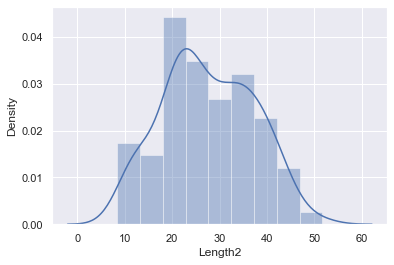

In [12]:
sns.distplot(fish_data1['Length2'])

In [13]:
q = fish_data1['Length2'].quantile(0.99)
fish_data1 = fish_data1[fish_data1['Length2']<q]
fish_data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,153.0,363.162745,309.428441,0.0000,120.0000,270.0000,600.0000,1100.000
Length1,153.0,25.210458,8.617364,7.5000,19.0000,24.1000,31.9000,43.200
Length2,153.0,27.313725,9.266962,8.4000,21.0000,26.5000,35.0000,46.000
Length3,153.0,30.085621,10.201518,8.8000,22.8000,29.0000,39.2000,48.700
Height,153.0,8.948258,4.363303,1.7284,5.9175,7.5852,12.3808,18.957
Width,153.0,4.340393,1.666603,1.0476,3.3516,4.2340,5.3550,8.142


C:\Users\bha38\Anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length3', ylabel='Density'>

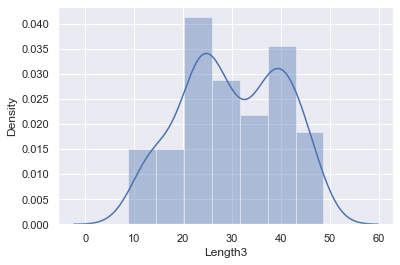

In [14]:
sns.distplot(fish_data1['Length3'])

In [16]:
q = fish_data1['Length3'].quantile(0.99)
fish_data1 = fish_data1[fish_data1['Length3']<q]
fish_data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,151.0,360.906623,310.830536,0.0000,120.00000,265.0000,600.00000,1100.000
Length1,151.0,24.980132,8.435576,7.5000,19.00000,24.0000,31.80000,41.100
Length2,151.0,27.072848,9.085703,8.4000,20.90000,26.5000,34.75000,44.000
Length3,151.0,29.843709,10.047398,8.8000,22.80000,28.9000,38.90000,46.600
Height,151.0,8.969083,4.388229,1.7284,5.89625,7.5852,12.40605,18.957
Width,151.0,4.333206,1.676490,1.0476,3.33830,4.2042,5.36270,8.142


C:\Users\bha38\Anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

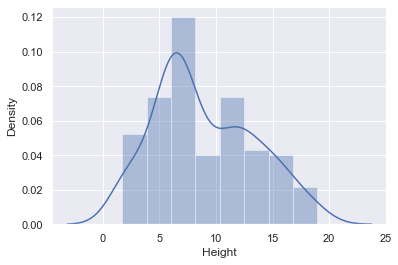

In [17]:
sns.distplot(fish_data1['Height'])

In [18]:
q = fish_data1['Height'].quantile(0.99)
fish_data1 = fish_data1[fish_data1['Height']<q]
fish_data1

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


C:\Users\bha38\Anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Width', ylabel='Density'>

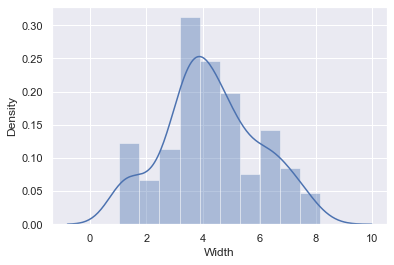

In [19]:
sns.distplot(fish_data1['Width'])

In [20]:
q = fish_data1['Width'].quantile(0.99)
fish_data1 = fish_data1[fish_data1['Width']<q]
fish_data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,147.0,345.114966,299.440946,0.0000,120.0000,250.0000,548.0000,1100.0000
Length1,147.0,24.691156,8.348119,7.5000,19.0000,24.0000,31.4500,41.1000
Length2,147.0,26.755102,8.983235,8.4000,20.7500,26.0000,34.0000,44.0000
Length3,147.0,29.491156,9.933346,8.8000,22.6500,28.9000,38.6500,46.6000
Height,147.0,8.792707,4.275482,1.7284,5.8655,7.4052,12.3659,18.6354
Width,147.0,4.251862,1.619938,1.0476,3.3233,4.1580,5.2793,7.5958


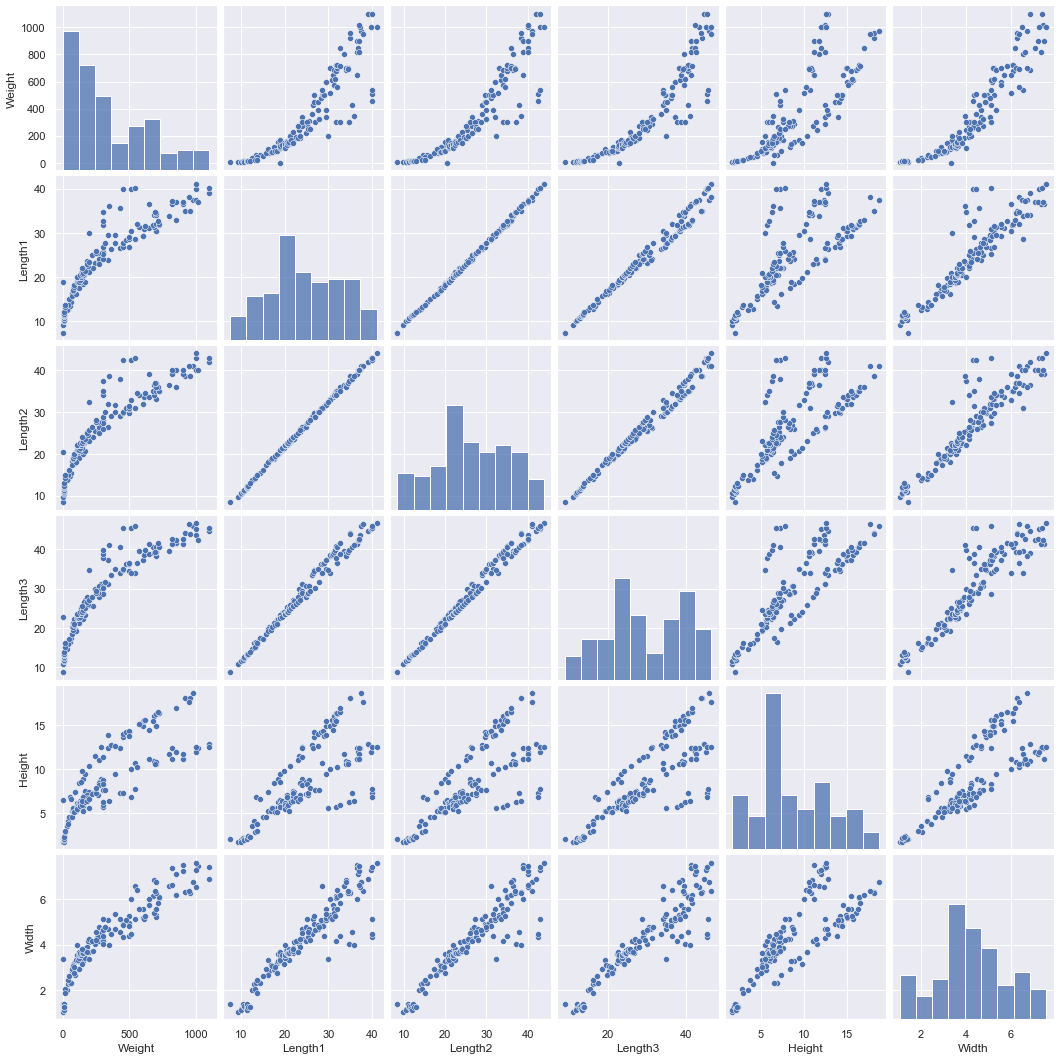

In [25]:
sns.pairplot(fish_data1.drop(['Species'], axis=1))


In [26]:
# All independent variables have exponential relationship
# with dependent variable Weight
# Hence log transformation is required

In [27]:
log_weight = np.log(fish_data1['Weight'])
log_weight

C:\Users\bha38\Anaconda3\envs\py3-TF2.0\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0      5.488938
1      5.669881
2      5.828946
3      5.894403
4      6.063785
         ...   
154    2.501436
155    2.595255
156    2.501436
157    2.980619
158    2.990720
Name: Weight, Length: 147, dtype: float64

In [28]:
fish_data1['log_weight'] = log_weight


<ipython-input-28-317da6f1b2d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fish_data1['log_weight'] = log_weight


In [29]:
fish_data1.describe()

,Weight,Length1,Length2,Length3,Height,Width,log_weight
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,345.114966,24.691156,26.755102,29.491156,8.792707,4.251862,-inf
std,299.440946,8.348119,8.983235,9.933346,4.275482,1.619938,NaN
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600,-inf
25%,120.000000,19.000000,20.750000,22.650000,5.865500,3.323300,4.787492
50%,250.000000,24.000000,26.000000,28.900000,7.405200,4.158000,5.521461
75%,548.000000,31.450000,34.000000,38.650000,12.365900,5.279300,6.306169
max,1100.000000,41.100000,44.000000,46.600000,18.635400,7.595800,7.003065


In [57]:
fish_data2 = fish_data1

In [58]:
fish_data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,147.0,345.114966,299.440946,0.0000,120.000000,250.000000,548.000000,1100.000000
Length1,147.0,24.691156,8.348119,7.5000,19.000000,24.000000,31.450000,41.100000
Length2,147.0,26.755102,8.983235,8.4000,20.750000,26.000000,34.000000,44.000000
Length3,147.0,29.491156,9.933346,8.8000,22.650000,28.900000,38.650000,46.600000
Height,147.0,8.792707,4.275482,1.7284,5.865500,7.405200,12.365900,18.635400
Width,147.0,4.251862,1.619938,1.0476,3.323300,4.158000,5.279300,7.595800
log_weight,147.0,-inf,NaN,-inf,4.787492,5.521461,6.306169,7.003065


In [59]:
fish_data2[fish_data2['log_weight'] == -np.inf]

,Species,Weight,Length1,Length2,Length3,Height,Width,log_weight
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516,-inf


In [60]:
# dropping the entry which has the weight of fish as 0.0 which is invalid

In [62]:
fish_data2 = fish_data2[fish_data2['Weight'] > 0.0]

In [66]:
fish_data2['Weight'].min()

5.9

In [68]:
fish_data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,146.0,347.478767,299.092332,5.900000,120.000000,255.000000,552.000000,1100.000000
Length1,146.0,24.730137,8.363421,7.500000,19.000000,24.000000,31.475000,41.100000
Length2,146.0,26.797945,8.999076,8.400000,20.850000,26.150000,34.000000,44.000000
Length3,146.0,29.536986,9.951933,8.800000,22.575000,28.900000,38.675000,46.600000
Height,146.0,8.808580,4.285851,1.728400,5.860750,7.469800,12.371850,18.635400
Width,146.0,4.258028,1.623782,1.047600,3.322450,4.161900,5.279700,7.595800
log_weight,146.0,5.288210,1.302489,1.774952,4.787492,5.541071,6.313469,7.003065


In [69]:
fish_data3 = fish_data2.drop(['Weight'], axis=1)

In [70]:
fish_data3.describe().T

,count,mean,std,min,25%,50%,75%,max
Length1,146.0,24.730137,8.363421,7.500000,19.000000,24.000000,31.475000,41.100000
Length2,146.0,26.797945,8.999076,8.400000,20.850000,26.150000,34.000000,44.000000
Length3,146.0,29.536986,9.951933,8.800000,22.575000,28.900000,38.675000,46.600000
Height,146.0,8.808580,4.285851,1.728400,5.860750,7.469800,12.371850,18.635400
Width,146.0,4.258028,1.623782,1.047600,3.322450,4.161900,5.279700,7.595800
log_weight,146.0,5.288210,1.302489,1.774952,4.787492,5.541071,6.313469,7.003065


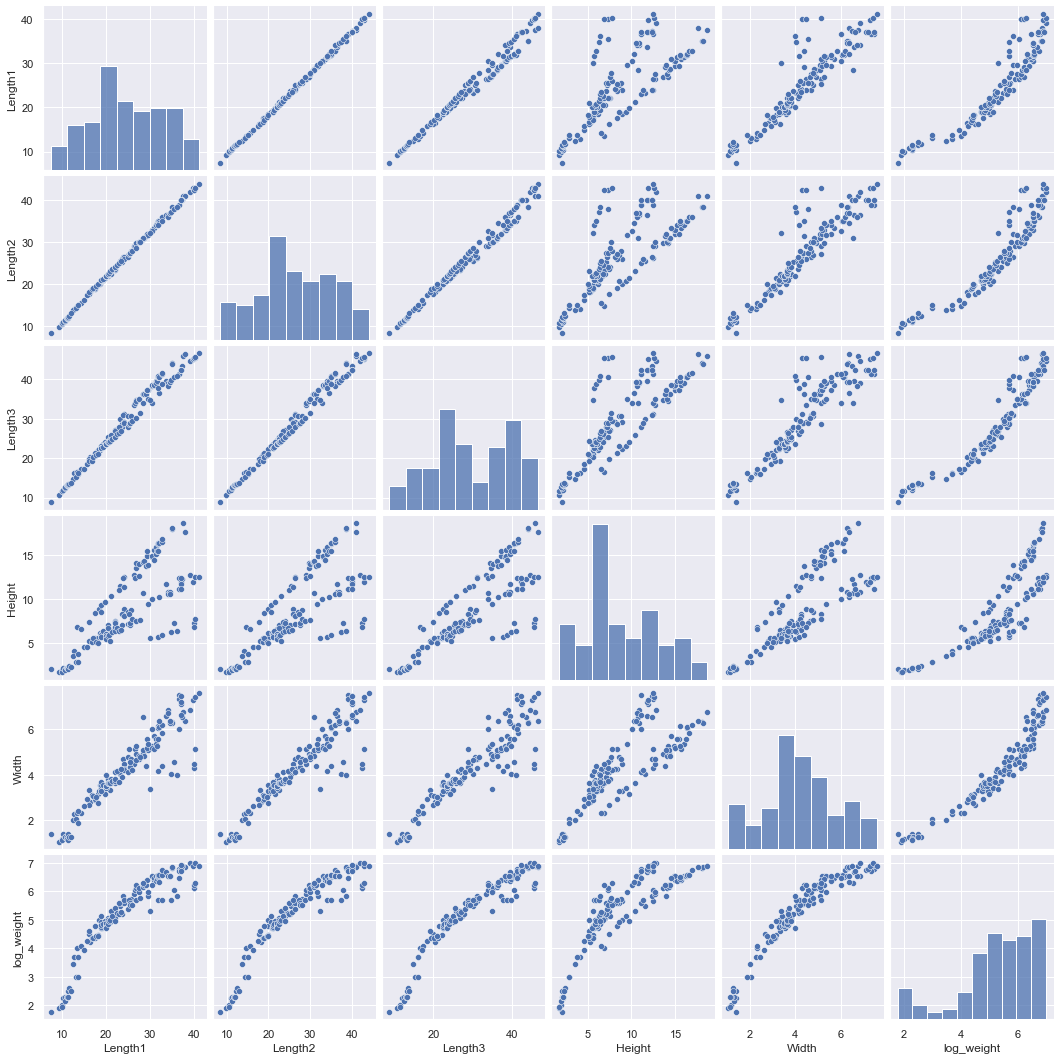

In [71]:
sns.pairplot(fish_data3)

In [72]:
# OLS Assumptions
# 1. Linearity is taken care of between dependent and independent variables above
# 2. No Endegeneith is not violated, and can be checked by residuals
# 3. Normality & Homosedasticity - Normality(huge sample), zero mean(intercept include), homosedasticity (fixed by log)
# 4. No autocorrelation - Not time series data
# 5. Multicollinearity - Check by VIF

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = fish_data3[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,10462.340212,Length1
1,13788.167930,Length2
2,2812.129433,Length3
3,73.462293,Height
4,107.838604,Width


In [74]:
# VIF less than 5 is generally accepted for not multicollinear
# but in this case all have very high value and we will include every one
# for our model


In [75]:
# Dummy for Categorical variable Species

In [76]:
fish_data_dummies = pd.get_dummies(fish_data3, drop_first = True)
fish_data_dummies.describe().T

,count,mean,std,min,25%,50%,75%,max
Length1,146.0,24.730137,8.363421,7.500000,19.000000,24.000000,31.475000,41.100000
Length2,146.0,26.797945,8.999076,8.400000,20.850000,26.150000,34.000000,44.000000
Length3,146.0,29.536986,9.951933,8.800000,22.575000,28.900000,38.675000,46.600000
Height,146.0,8.808580,4.285851,1.728400,5.860750,7.469800,12.371850,18.635400
Width,146.0,4.258028,1.623782,1.047600,3.322450,4.161900,5.279700,7.595800
log_weight,146.0,5.288210,1.302489,1.774952,4.787492,5.541071,6.313469,7.003065
Species_Parkki,146.0,0.075342,0.264852,0.000000,0.000000,0.000000,0.000000,1.000000
Species_Perch,146.0,0.369863,0.484429,0.000000,0.000000,0.000000,1.000000,1.000000
Species_Pike,146.0,0.061644,0.241335,0.000000,0.000000,0.000000,0.000000,1.000000
Species_Roach,146.0,0.130137,0.337612,0.000000,0.000000,0.000000,0.000000,1.000000


In [78]:
fish_data_dummies.columns.values

array(['Length1', 'Length2', 'Length3', 'Height', 'Width', 'log_weight',
       'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach',
       'Species_Smelt', 'Species_Whitefish'], dtype=object)

In [79]:
cols = ['log_weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach',
       'Species_Smelt', 'Species_Whitefish']

In [80]:
fish_data_preprocessed = fish_data_dummies[cols]

In [81]:
fish_data_preprocessed.describe().T

,count,mean,std,min,25%,50%,75%,max
log_weight,146.0,5.288210,1.302489,1.774952,4.787492,5.541071,6.313469,7.003065
Length1,146.0,24.730137,8.363421,7.500000,19.000000,24.000000,31.475000,41.100000
Length2,146.0,26.797945,8.999076,8.400000,20.850000,26.150000,34.000000,44.000000
Length3,146.0,29.536986,9.951933,8.800000,22.575000,28.900000,38.675000,46.600000
Height,146.0,8.808580,4.285851,1.728400,5.860750,7.469800,12.371850,18.635400
Width,146.0,4.258028,1.623782,1.047600,3.322450,4.161900,5.279700,7.595800
Species_Parkki,146.0,0.075342,0.264852,0.000000,0.000000,0.000000,0.000000,1.000000
Species_Perch,146.0,0.369863,0.484429,0.000000,0.000000,0.000000,1.000000,1.000000
Species_Pike,146.0,0.061644,0.241335,0.000000,0.000000,0.000000,0.000000,1.000000
Species_Roach,146.0,0.130137,0.337612,0.000000,0.000000,0.000000,0.000000,1.000000


In [82]:
# Linear Regression Model

In [84]:
# Declare input and target variables
inputs = fish_data_preprocessed.drop(['log_weight'], axis=1)
targets = fish_data_preprocessed['log_weight']

In [85]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [86]:
inputs_scaled = scaler.transform(inputs)

In [88]:
# Train Test Split

In [89]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [91]:
# Create the regression
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [92]:
y_hat = reg.predict(x_train)

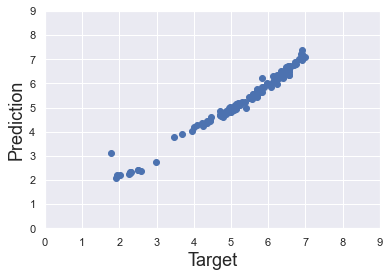

In [94]:
plt.scatter(y_train, y_hat)
plt.xlabel('Target', size=18)
plt.ylabel('Prediction', size=18)
plt.xlim(0, 9)
plt.ylim(0, 9)
plt.show()

C:\Users\bha38\Anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

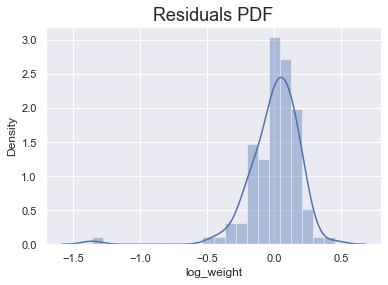

In [95]:
sns.distplot(y_train - y_hat)
plt.title('Residuals PDF', size = 18)

In [97]:
np.max(y_train - y_hat)

0.4503250538934678

In [98]:
np.min(y_train - y_hat)

-1.3579527558473492

In [99]:
# The difference of predictions vs targets on training data lies between
# -1.36 to 0.45

In [100]:
reg.score(x_train, y_train)

0.9769016103387222

In [101]:
# RSquared id 97% which is a good fit

In [102]:
reg.intercept_

5.2841397968437

In [103]:
reg.coef_

array([-0.58290154,  0.35974974,  1.19938104, -0.06308313,  0.19441226,
        0.07362054,  0.00588801, -0.14934307, -0.00712377, -0.3393784 ,
        0.02510413])

In [137]:
table_coeff = pd.DataFrame([['Bias/Intercept', reg.intercept_]], columns=['Name', 'Coeff'])
table_coeff 

,Name,Coeff
0,Bias/Intercept,5.28414


In [131]:
other_coeffs = pd.DataFrame()

In [132]:
other_coeffs['Name'] = inputs.columns.values

In [133]:
other_coeffs['Coeff'] = reg.coef_

In [139]:
table_coeff = pd.concat([table_coeff, other_coeffs])

In [140]:
table_coeff

,Name,Coeff
0,Bias/Intercept,5.284140
0,Length1,-0.582902
1,Length2,0.359750
2,Length3,1.199381
3,Height,-0.063083
4,Width,0.194412
5,Species_Parkki,0.073621
6,Species_Perch,0.005888
7,Species_Pike,-0.149343
8,Species_Roach,-0.007124


In [141]:
# Testing

In [142]:
y_hat_test = reg.predict(x_test)

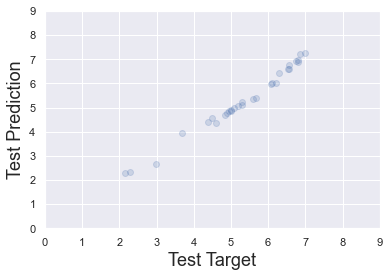

In [151]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Test Target', size=18)
plt.ylabel('Test Prediction', size=18)
plt.xlim(0, 9)
plt.ylim(0, 9)
plt.show()